In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress
from sklearn import datasets
import seaborn as sns

# Study data files
readin = "../dataset/water_potability.csv"

# create a dataframe
OG_df = pd.read_csv(readin)
OG_df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [3]:
df2 = OG_df.dropna(axis=0,how='any')
df2.head(10)

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
5,5.584087,188.313324,28748.687739,7.544869,326.678363,280.467916,8.399735,54.917862,2.559708,0
6,10.223862,248.071735,28749.716544,7.513408,393.663396,283.651634,13.789695,84.603556,2.672989,0
7,8.635849,203.361523,13672.091764,4.563009,303.309771,474.607645,12.363817,62.798309,4.401425,0
9,11.180284,227.231469,25484.508491,9.077200,404.041635,563.885481,17.927806,71.976601,4.370562,0
10,7.360640,165.520797,32452.614409,7.550701,326.624353,425.383419,15.586810,78.740016,3.662292,0
12,7.119824,156.704993,18730.813653,3.606036,282.344050,347.715027,15.929536,79.500778,3.445756,0
15,6.347272,186.732881,41065.234765,9.629596,364.487687,516.743282,11.539781,75.071617,4.376348,0
17,9.181560,273.813807,24041.326280,6.904990,398.350517,477.974642,13.387341,71.457362,4.503661,0


In [4]:
df2['Solids'] = df2['Solids'].div(100)
df2.head()

<ipython-input-4-47f91a1a9675>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Solids'] = df2['Solids'].div(100)


,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
3,8.316766,214.373394,220.184174,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,179.789863,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
5,5.584087,188.313324,287.486877,7.544869,326.678363,280.467916,8.399735,54.917862,2.559708,0
6,10.223862,248.071735,287.497165,7.513408,393.663396,283.651634,13.789695,84.603556,2.672989,0
7,8.635849,203.361523,136.720918,4.563009,303.309771,474.607645,12.363817,62.798309,4.401425,0


In [5]:
df2.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000
mean,7.085990,195.968072,219.174414,7.134338,333.224672,426.526409,14.357709,66.400859,3.969729,0.403282
std,1.573337,32.635085,86.422398,1.584820,41.205172,80.712572,3.324959,16.077109,0.780346,0.490678
min,0.227499,73.492234,3.209426,1.390871,129.000000,201.619737,2.200000,8.577013,1.450000,0.000000
25%,6.089723,176.744938,156.156654,6.138895,307.632511,366.680307,12.124105,55.952664,3.442915,0.000000
50%,7.027297,197.191839,209.335127,7.143907,332.232177,423.455906,14.322019,66.542198,3.968177,0.000000
75%,8.052969,216.441070,271.825871,8.109726,359.330555,482.373169,16.683049,77.291925,4.514175,1.000000
max,14.000000,317.338124,564.886724,13.127000,481.030642,753.342620,27.006707,124.000000,6.494749,1.000000


In [6]:
df2[df2['Potability']==1].describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,811.000000,811.000000,811.000000,811.000000,811.000000,811.000000,811.000000,811.000000,811.000000,811.0
mean,7.113791,195.908341,223.449229,7.174395,332.457832,425.005423,14.294764,66.581596,3.991254,1.0
std,1.437623,35.301146,88.915480,1.732796,47.446190,81.950982,3.257917,16.297713,0.776408,0.0
min,0.227499,73.492234,11.989437,1.390871,129.000000,201.619737,2.200000,8.577013,1.492207,1.0
25%,6.256039,174.380497,158.160766,6.106169,301.768819,360.275012,12.148355,55.751069,3.440564,1.0
50%,7.046549,197.617494,212.171586,7.212254,331.087177,421.099917,14.252684,66.612984,4.007347,1.0
75%,7.955161,218.414531,276.961344,8.181431,365.632984,482.296528,16.561121,77.372587,4.527463,1.0
max,11.898078,317.338124,564.886724,13.127000,481.030642,695.369528,23.604298,124.000000,6.494249,1.0


In [7]:
df2[df2['Potability']==0].describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.0
mean,7.067201,196.008440,216.285351,7.107267,333.742928,427.554342,14.400250,66.278712,3.955181,0.0
std,1.659106,30.717642,84.611087,1.476577,36.398403,79.882677,3.370196,15.931953,0.782984,0.0
min,1.431782,98.452931,3.209426,2.456014,203.444521,210.319182,4.371899,14.343161,1.450000,0.0
25%,5.982888,177.313440,153.789073,6.169384,310.653441,369.580980,12.118659,56.152070,3.444706,0.0
50%,6.992004,196.799368,205.073996,7.103718,332.615625,424.479471,14.351828,66.206116,3.944085,0.0
75%,8.141979,214.532109,267.865462,8.076759,356.432048,482.333786,16.787531,77.144621,4.497522,0.0
max,14.000000,300.292476,553.347028,12.653362,460.107069,753.342620,27.006707,120.030077,6.494749,0.0


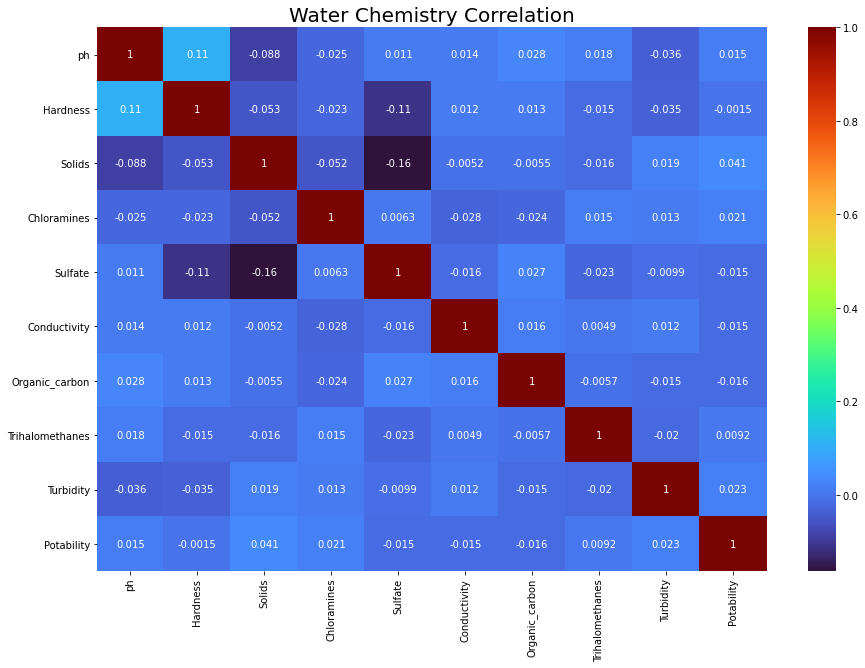

In [44]:
plt.figure(figsize=(15,10))
ax = sns.heatmap(df2.corr(), annot=True, cmap="turbo")
ax.set_title(f'Water Chemistry Correlation', size= 20)
plt.savefig("../misc/Fig1.png")

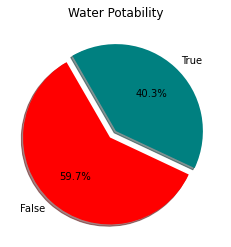

In [45]:
gender = df2["Potability"].value_counts()
labels = ['False', 'True']
colors = ['Red', 'teal']

plt.pie(gender, explode = (0.1, 0), labels=labels, colors=colors, autopct="%1.1f%%", 
        shadow = True, startangle = 120)
plt.title("Water Potability")
plt.savefig("../misc/Fig2.png")
plt.show()

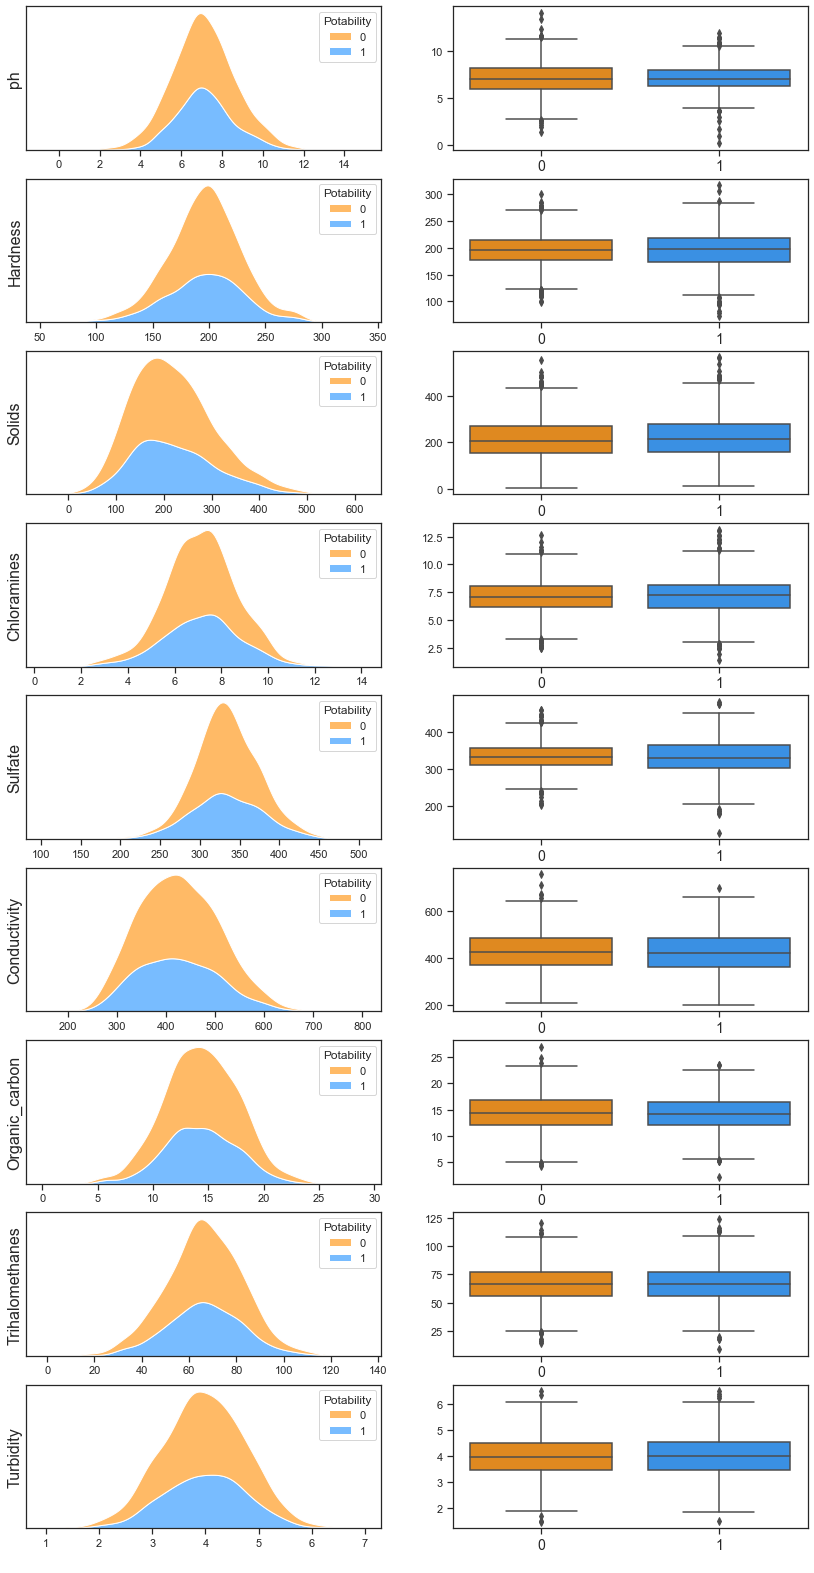

In [19]:
# Prepare chart area
fig, ax = plt.subplots(ncols=2, nrows=9, figsize=(14, 28))
# prep dataframe for looping
features = list(df2.columns.drop('Potability'))
i=0
# loop through dataframe
for cols in features:
    sns.kdeplot(df2[cols], fill=True, alpha=0.6, hue = df2.Potability, 
                palette=('darkorange', 'dodgerblue'), multiple='stack', ax=ax[i,0])
    
    sns.boxplot(data= df2, y=cols, x='Potability', ax=ax[i, 1],
               palette=('darkorange', 'dodgerblue'))
    ax[i,0].set_xlabel(' ')
    ax[i,1].set_xlabel(' ')
    ax[i,1].set_ylabel(' ')
    ax[i,1].xaxis.set_tick_params(labelsize=14)
    ax[i,0].tick_params(left=False, labelleft=False)
    ax[i,0].set_ylabel(cols, fontsize=16)
    i=i+1
plt.savefig("../misc/Fig3.png")
plt.show()

In [8]:
df3 = df2[df2['Potability']==0]
df3.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
3,8.316766,214.373394,220.184174,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,179.789863,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
5,5.584087,188.313324,287.486877,7.544869,326.678363,280.467916,8.399735,54.917862,2.559708,0
6,10.223862,248.071735,287.497165,7.513408,393.663396,283.651634,13.789695,84.603556,2.672989,0
7,8.635849,203.361523,136.720918,4.563009,303.309771,474.607645,12.363817,62.798309,4.401425,0


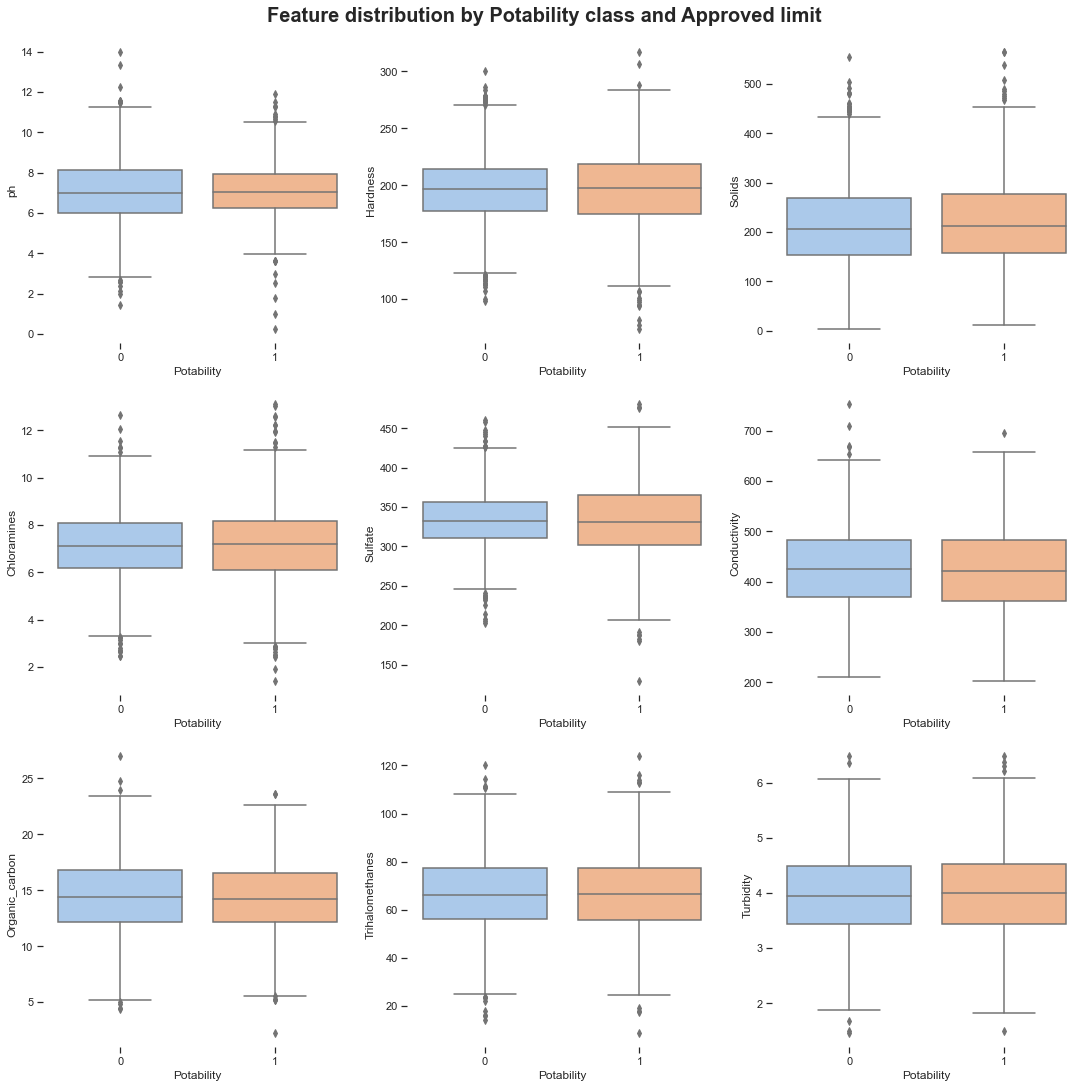

In [26]:
int_cols = df2.select_dtypes(exclude=['category']).columns.to_list()
fig, ax= plt.subplots(nrows=3, ncols=3, figsize=(15,15), constrained_layout=True)
plt.suptitle('Feature distribution by Potability class and Approved limit', size=20, weight='bold')
ax=ax.flatten()
for x, i in enumerate(int_cols):
    if i == "Potability":
        continue
    sns.boxplot(data=df2, y=i, x='Potability', ax=ax[x])
    for s in ['left','right','top','bottom']:
        ax[x].spines[s].set_visible(False)
plt.savefig("../misc/Fig4.png")

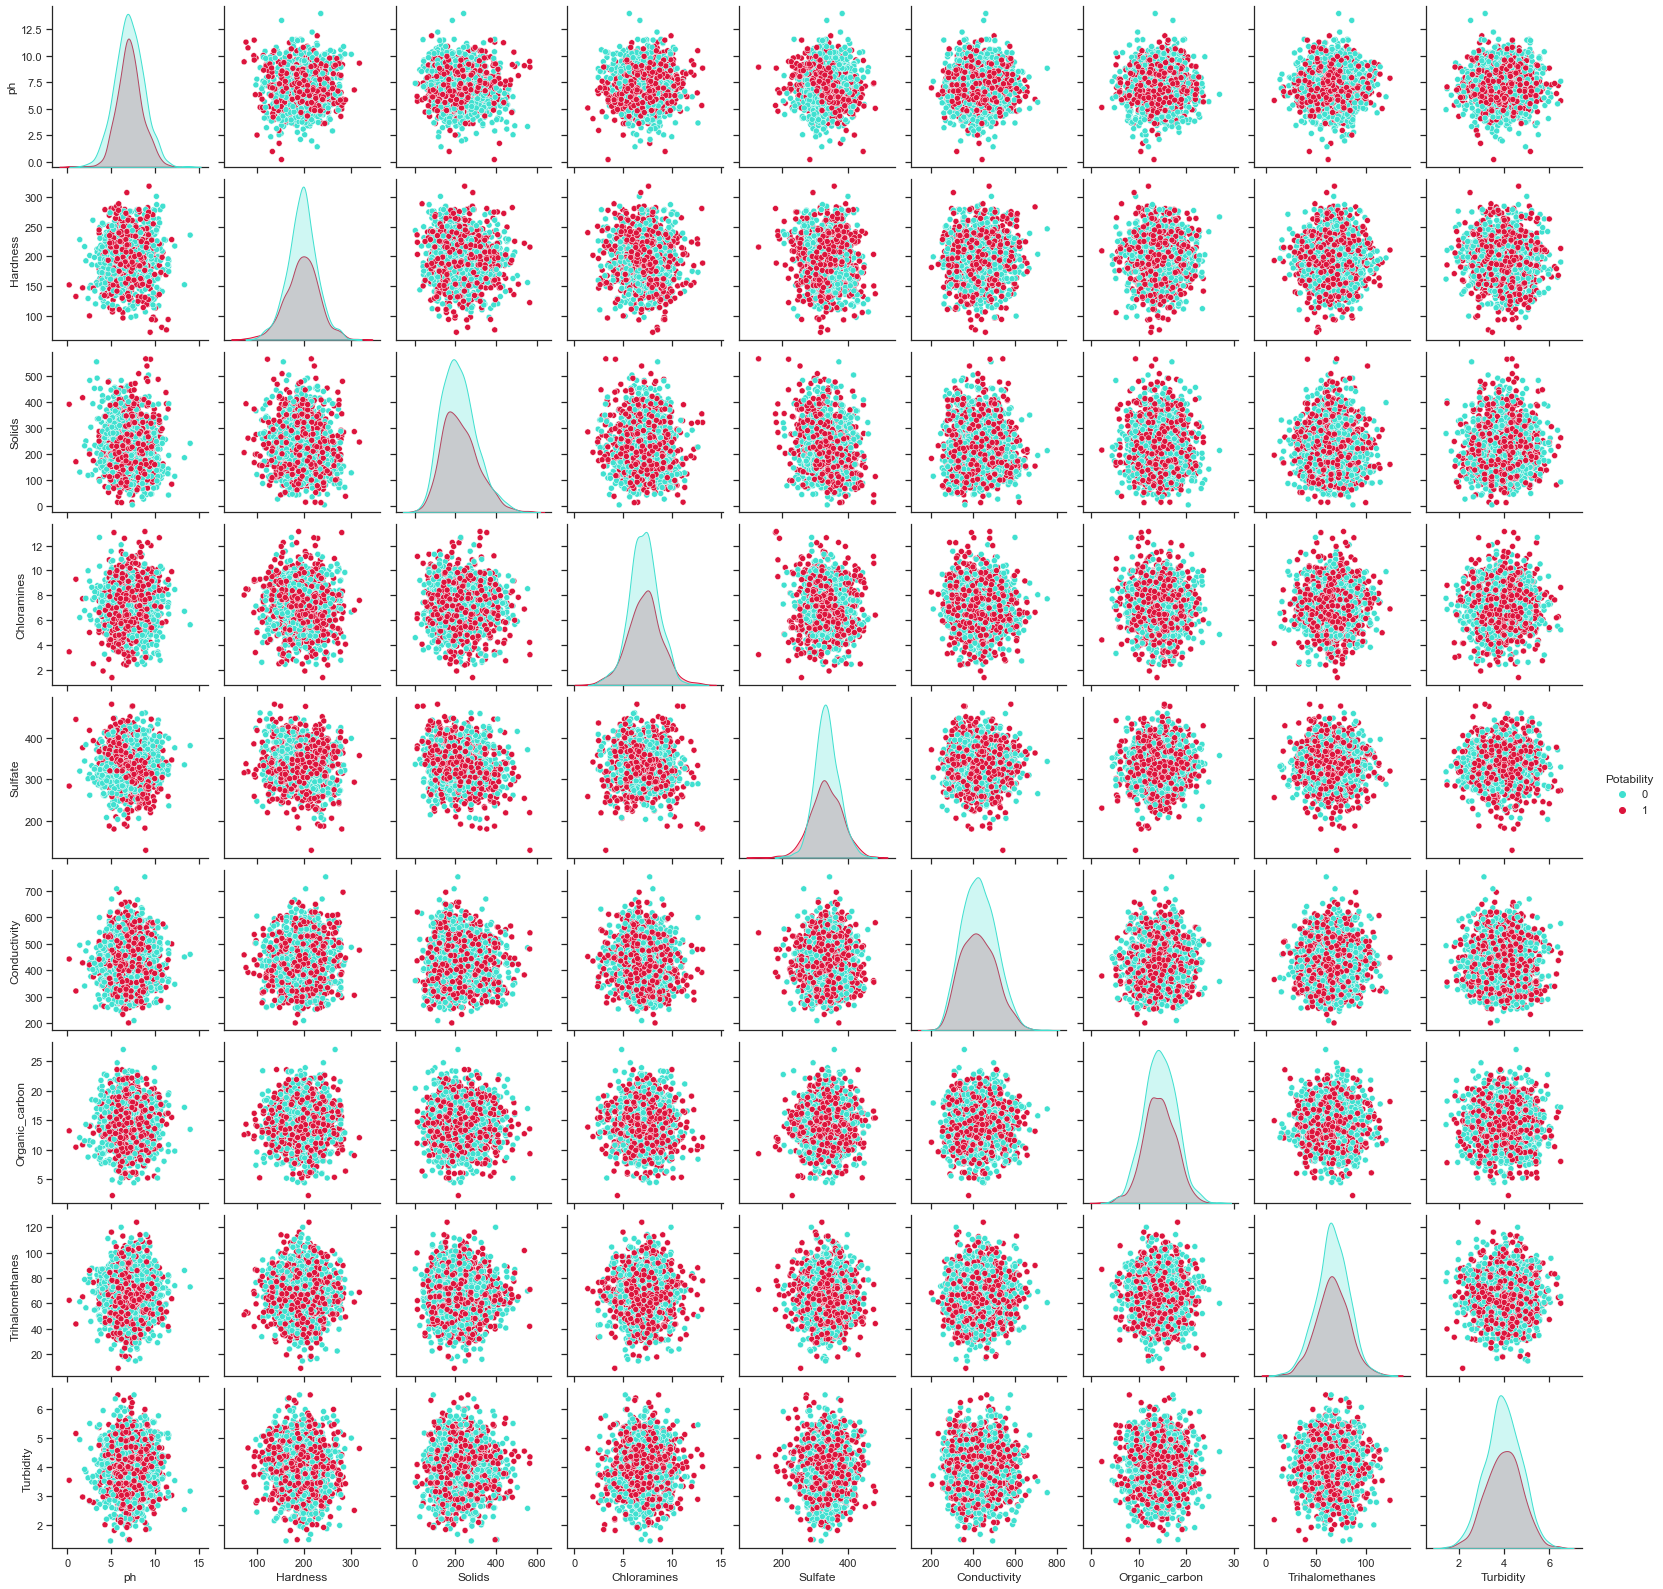

In [27]:
sns.pairplot(data=df2, hue="Potability", palette= ('turquoise', 'crimson'))
plt.savefig("../misc/Fig5.png")

In [33]:

print('Correlation of Potability:')
features = list(df2.columns.drop('Potability'))

Corr = list()
for cols in features:
    Corr.append(df2[cols].corr(df2['Potability']))

corrDf = pd.DataFrame({'Features' : features, 'Correlation' : Corr})
corrDf['Correlation'] = corrDf['Correlation'].abs()
corrDf.sort_values(by='Correlation', ascending = True)


Correlation of Potability:


,Features,Correlation
1,Hardness,0.001505
7,Trihalomethanes,0.009244
0,ph,0.014530
4,Sulfate,0.015303
5,Conductivity,0.015496
6,Organic_carbon,0.015567
3,Chloramines,0.020784
8,Turbidity,0.022682
2,Solids,0.040674


In [37]:
df2.describe().T.style.bar(
    subset=['mean'],
    color='#606ff2').background_gradient(
    subset=['std'], cmap='copper').background_gradient(subset=['50%'], cmap='copper')

,count,mean,std,min,25%,50%,75%,max
ph,2011.000000,7.085990,1.573337,0.227499,6.089723,7.027297,8.052969,14.000000
Hardness,2011.000000,195.968072,32.635085,73.492234,176.744938,197.191839,216.441070,317.338124
Solids,2011.000000,219.174414,86.422398,3.209426,156.156654,209.335127,271.825871,564.886724
Chloramines,2011.000000,7.134338,1.584820,1.390871,6.138895,7.143907,8.109726,13.127000
Sulfate,2011.000000,333.224672,41.205172,129.000000,307.632511,332.232177,359.330555,481.030642
Conductivity,2011.000000,426.526409,80.712572,201.619737,366.680307,423.455906,482.373169,753.342620
Organic_carbon,2011.000000,14.357709,3.324959,2.200000,12.124105,14.322019,16.683049,27.006707
Trihalomethanes,2011.000000,66.400859,16.077109,8.577013,55.952664,66.542198,77.291925,124.000000
Turbidity,2011.000000,3.969729,0.780346,1.450000,3.442915,3.968177,4.514175,6.494749
Potability,2011.000000,0.403282,0.490678,0.000000,0.000000,0.000000,1.000000,1.000000
